In [34]:
import pandas as pd
import seaborn as sns

In [10]:
data = pd.read_csv('openings.csv')
data.head()

Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% White_odds  \
0  ...     Nd5     d4     d6    Bc4    NaN       40.8       35.0   1.165714   
1  ...     Ng8    NaN    NaN    NaN    NaN       47.8       29.8   1.604027   
2  ...     Nd5     d4     d6     c4    Nb6       40.8       31.5   1.295238   
3  ...     Nd5     d4     d6     c4    Nb6       39.7       37.1   1.070081   
4  ...     Nd5     d4     d6     c4    Nb6       40.9       37.8   1.082011   

  White_Wins Black_Wins  
0    282.336    242.200  
1    108.984     67.944  
2   2645.880   2042.775  
3    349.757    326.851  
4    105.931     97.902  

[5 rows x 26 columns]

First this data has to be cleaned so that we can use it. 
There are useless data points such as last played we have to remove them.
Removing NaN values and converting string values to float values.


In [11]:
data.columns

Index(['Unnamed: 0', 'Opening', 'Colour', 'Num Games', 'ECO', 'Last Played',
       'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %',
       'Moves', 'moves_list', 'move1w', 'move1b', 'move2w', 'move2b', 'move3w',
       'move3b', 'move4w', 'move4b', 'White_win%', 'Black_win%', 'White_odds',
       'White_Wins', 'Black_Wins'],
      dtype='object')

In [12]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['Last Played'], axis=1, inplace=True)

In [14]:
data.drop(['Moves'], axis=1, inplace=True)
data.drop(['move1w'], axis=1, inplace=True)
data.drop(['move1b'], axis=1, inplace=True)
data.drop(['move2w'], axis=1, inplace=True)
data.drop(['move2b'], axis=1, inplace=True)
data.drop(['move3w'], axis=1, inplace=True)
data.drop(['move3b'], axis=1, inplace=True)
data.drop(['move4w'], axis=1, inplace=True)
data.drop(['move4b'], axis=1, inplace=True)


In [16]:
data.drop(['moves_list'], axis=1, inplace=True)

I dropped these values because they are unreliaable and not useful for the model.

In [17]:
data.head()

Opening Colour  Num Games  ECO  \
0                 Alekhine Defense, Balogh Variation  white        692  B03   
1               Alekhine Defense, Brooklyn Variation  black        228  B02   
2               Alekhine Defense, Exchange Variation  white       6485  B03   
3                Alekhine Defense, Four Pawns Attack  white        881  B03   
4  Alekhine Defense, Four Pawns Attack, Fianchett...  black        259  B03   

   Perf Rating  Avg Player  Player Win %  Draw %  Opponent Win %  White_win%  \
0         2247        2225          40.8    24.3            35.0        40.8   
1         2145        2193          29.8    22.4            47.8        47.8   
2         2244        2194          40.8    27.7            31.5        40.8   
3         2187        2130          39.7    23.2            37.1        39.7   
4         2122        2178          37.8    21.2            40.9        40.9   

   Black_win%  White_odds  White_Wins  Black_Wins  
0        35.0    1.165714     282.336     242.200  
1        29.8    1.604027     108.984      67.944  
2        31.5    1.295238    2645.880    2042.775  
3        37.1    1.070081     349.757     326.851  
4        37.8    1.082011     105.931      97.902

In [21]:
#mach each opening to a number 
data['Opening'] = data['ECO']

data.drop(['ECO'], axis=1, inplace=True)

In [22]:
data.head()

Opening Colour  Num Games  Perf Rating  Avg Player  Player Win %  Draw %  \
0     B03  white        692         2247        2225          40.8    24.3   
1     B02  black        228         2145        2193          29.8    22.4   
2     B03  white       6485         2244        2194          40.8    27.7   
3     B03  white        881         2187        2130          39.7    23.2   
4     B03  black        259         2122        2178          37.8    21.2   

   Opponent Win %  White_win%  Black_win%  White_odds  White_Wins  Black_Wins  
0            35.0        40.8        35.0    1.165714     282.336     242.200  
1            47.8        47.8        29.8    1.604027     108.984      67.944  
2            31.5        40.8        31.5    1.295238    2645.880    2042.775  
3            37.1        39.7        37.1    1.070081     349.757     326.851  
4            40.9        40.9        37.8    1.082011     105.931      97.902

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Opening         1884 non-null   object 
 1   Colour          1884 non-null   object 
 2   Num Games       1884 non-null   int64  
 3   Perf Rating     1884 non-null   int64  
 4   Avg Player      1884 non-null   int64  
 5   Player Win %    1884 non-null   float64
 6   Draw %          1884 non-null   float64
 7   Opponent Win %  1884 non-null   float64
 8   White_win%      1884 non-null   float64
 9   Black_win%      1884 non-null   float64
 10  White_odds      1884 non-null   float64
 11  White_Wins      1884 non-null   float64
 12  Black_Wins      1884 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 191.5+ KB


In [24]:
#convert opening type to a number
data['Opening'] = data['Opening'].astype('category')
data['Opening'] = data['Opening'].cat.codes


In [25]:
data.head()

Opening Colour  Num Games  Perf Rating  Avg Player  Player Win %  Draw %  \
0      103  white        692         2247        2225          40.8    24.3   
1      102  black        228         2145        2193          29.8    22.4   
2      103  white       6485         2244        2194          40.8    27.7   
3      103  white        881         2187        2130          39.7    23.2   
4      103  black        259         2122        2178          37.8    21.2   

   Opponent Win %  White_win%  Black_win%  White_odds  White_Wins  Black_Wins  
0            35.0        40.8        35.0    1.165714     282.336     242.200  
1            47.8        47.8        29.8    1.604027     108.984      67.944  
2            31.5        40.8        31.5    1.295238    2645.880    2042.775  
3            37.1        39.7        37.1    1.070081     349.757     326.851  
4            40.9        40.9        37.8    1.082011     105.931      97.902

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Opening         1884 non-null   int16  
 1   Colour          1884 non-null   object 
 2   Num Games       1884 non-null   int64  
 3   Perf Rating     1884 non-null   int64  
 4   Avg Player      1884 non-null   int64  
 5   Player Win %    1884 non-null   float64
 6   Draw %          1884 non-null   float64
 7   Opponent Win %  1884 non-null   float64
 8   White_win%      1884 non-null   float64
 9   Black_win%      1884 non-null   float64
 10  White_odds      1884 non-null   float64
 11  White_Wins      1884 non-null   float64
 12  Black_Wins      1884 non-null   float64
dtypes: float64(8), int16(1), int64(3), object(1)
memory usage: 180.4+ KB


In [28]:
#convert colour to 1 or 0 if white or black
data['Colour'] = data['Colour'].astype('category')
data['Colour'] = data['Colour'].cat.codes


In [29]:
data.head()

Opening  Colour  Num Games  Perf Rating  Avg Player  Player Win %  Draw %  \
0      103       1        692         2247        2225          40.8    24.3   
1      102       0        228         2145        2193          29.8    22.4   
2      103       1       6485         2244        2194          40.8    27.7   
3      103       1        881         2187        2130          39.7    23.2   
4      103       0        259         2122        2178          37.8    21.2   

   Opponent Win %  White_win%  Black_win%  White_odds  White_Wins  Black_Wins  
0            35.0        40.8        35.0    1.165714     282.336     242.200  
1            47.8        47.8        29.8    1.604027     108.984      67.944  
2            31.5        40.8        31.5    1.295238    2645.880    2042.775  
3            37.1        39.7        37.1    1.070081     349.757     326.851  
4            40.9        40.9        37.8    1.082011     105.931      97.902

In [30]:
data.describe()

Opening       Colour     Num Games  Perf Rating   Avg Player  \
count  1884.000000  1884.000000   1884.000000  1884.000000  1884.000000   
mean    215.470276     0.473461   1846.019108  2235.945860  2236.531847   
std     133.480559     0.499428   2739.103462   135.260392   127.723711   
min       0.000000     0.000000    100.000000  1583.000000  1577.000000   
25%     107.000000     0.000000    314.750000  2157.000000  2166.000000   
50%     218.000000     0.000000    788.500000  2252.500000  2255.000000   
75%     315.000000     1.000000   2225.000000  2329.000000  2326.000000   
max     492.000000     1.000000  22482.000000  2536.000000  2492.000000   

       Player Win %       Draw %  Opponent Win %   White_win%   Black_win%  \
count   1884.000000  1884.000000     1884.000000  1884.000000  1884.000000   
mean      35.159395    29.914066       34.928715    39.745701    30.342410   
std        9.077139     8.043043        9.180450     7.671108     7.976305   
min        7.500000     4.000000        6.700000    13.600000     6.700000   
25%       28.900000    24.500000       28.900000    34.800000    25.100000   
50%       35.100000    29.400000       34.650000    39.100000    29.900000   
75%       41.125000    34.625000       40.525000    44.000000    35.000000   
max       77.600000    68.500000       77.500000    77.600000    64.800000   

        White_odds   White_Wins   Black_Wins  
count  1884.000000  1884.000000  1884.000000  
mean      1.448725   708.835970   557.051955  
std       0.673991  1037.027669   866.788831  
min       0.308642    21.000000     8.946000  
25%       1.037277   124.740500    91.026250  
50%       1.325008   310.274000   230.952000  
75%       1.674116   824.243000   651.262750  
max       9.810127  8295.858000  8700.534000

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Opening         1884 non-null   int16  
 1   Colour          1884 non-null   int8   
 2   Num Games       1884 non-null   int64  
 3   Perf Rating     1884 non-null   int64  
 4   Avg Player      1884 non-null   int64  
 5   Player Win %    1884 non-null   float64
 6   Draw %          1884 non-null   float64
 7   Opponent Win %  1884 non-null   float64
 8   White_win%      1884 non-null   float64
 9   Black_win%      1884 non-null   float64
 10  White_odds      1884 non-null   float64
 11  White_Wins      1884 non-null   float64
 12  Black_Wins      1884 non-null   float64
dtypes: float64(8), int16(1), int64(3), int8(1)
memory usage: 167.6 KB


now that all values are int or float we can use them 

we can make predictions based on the data we have such as which opening is the best for a certain bracket of rating

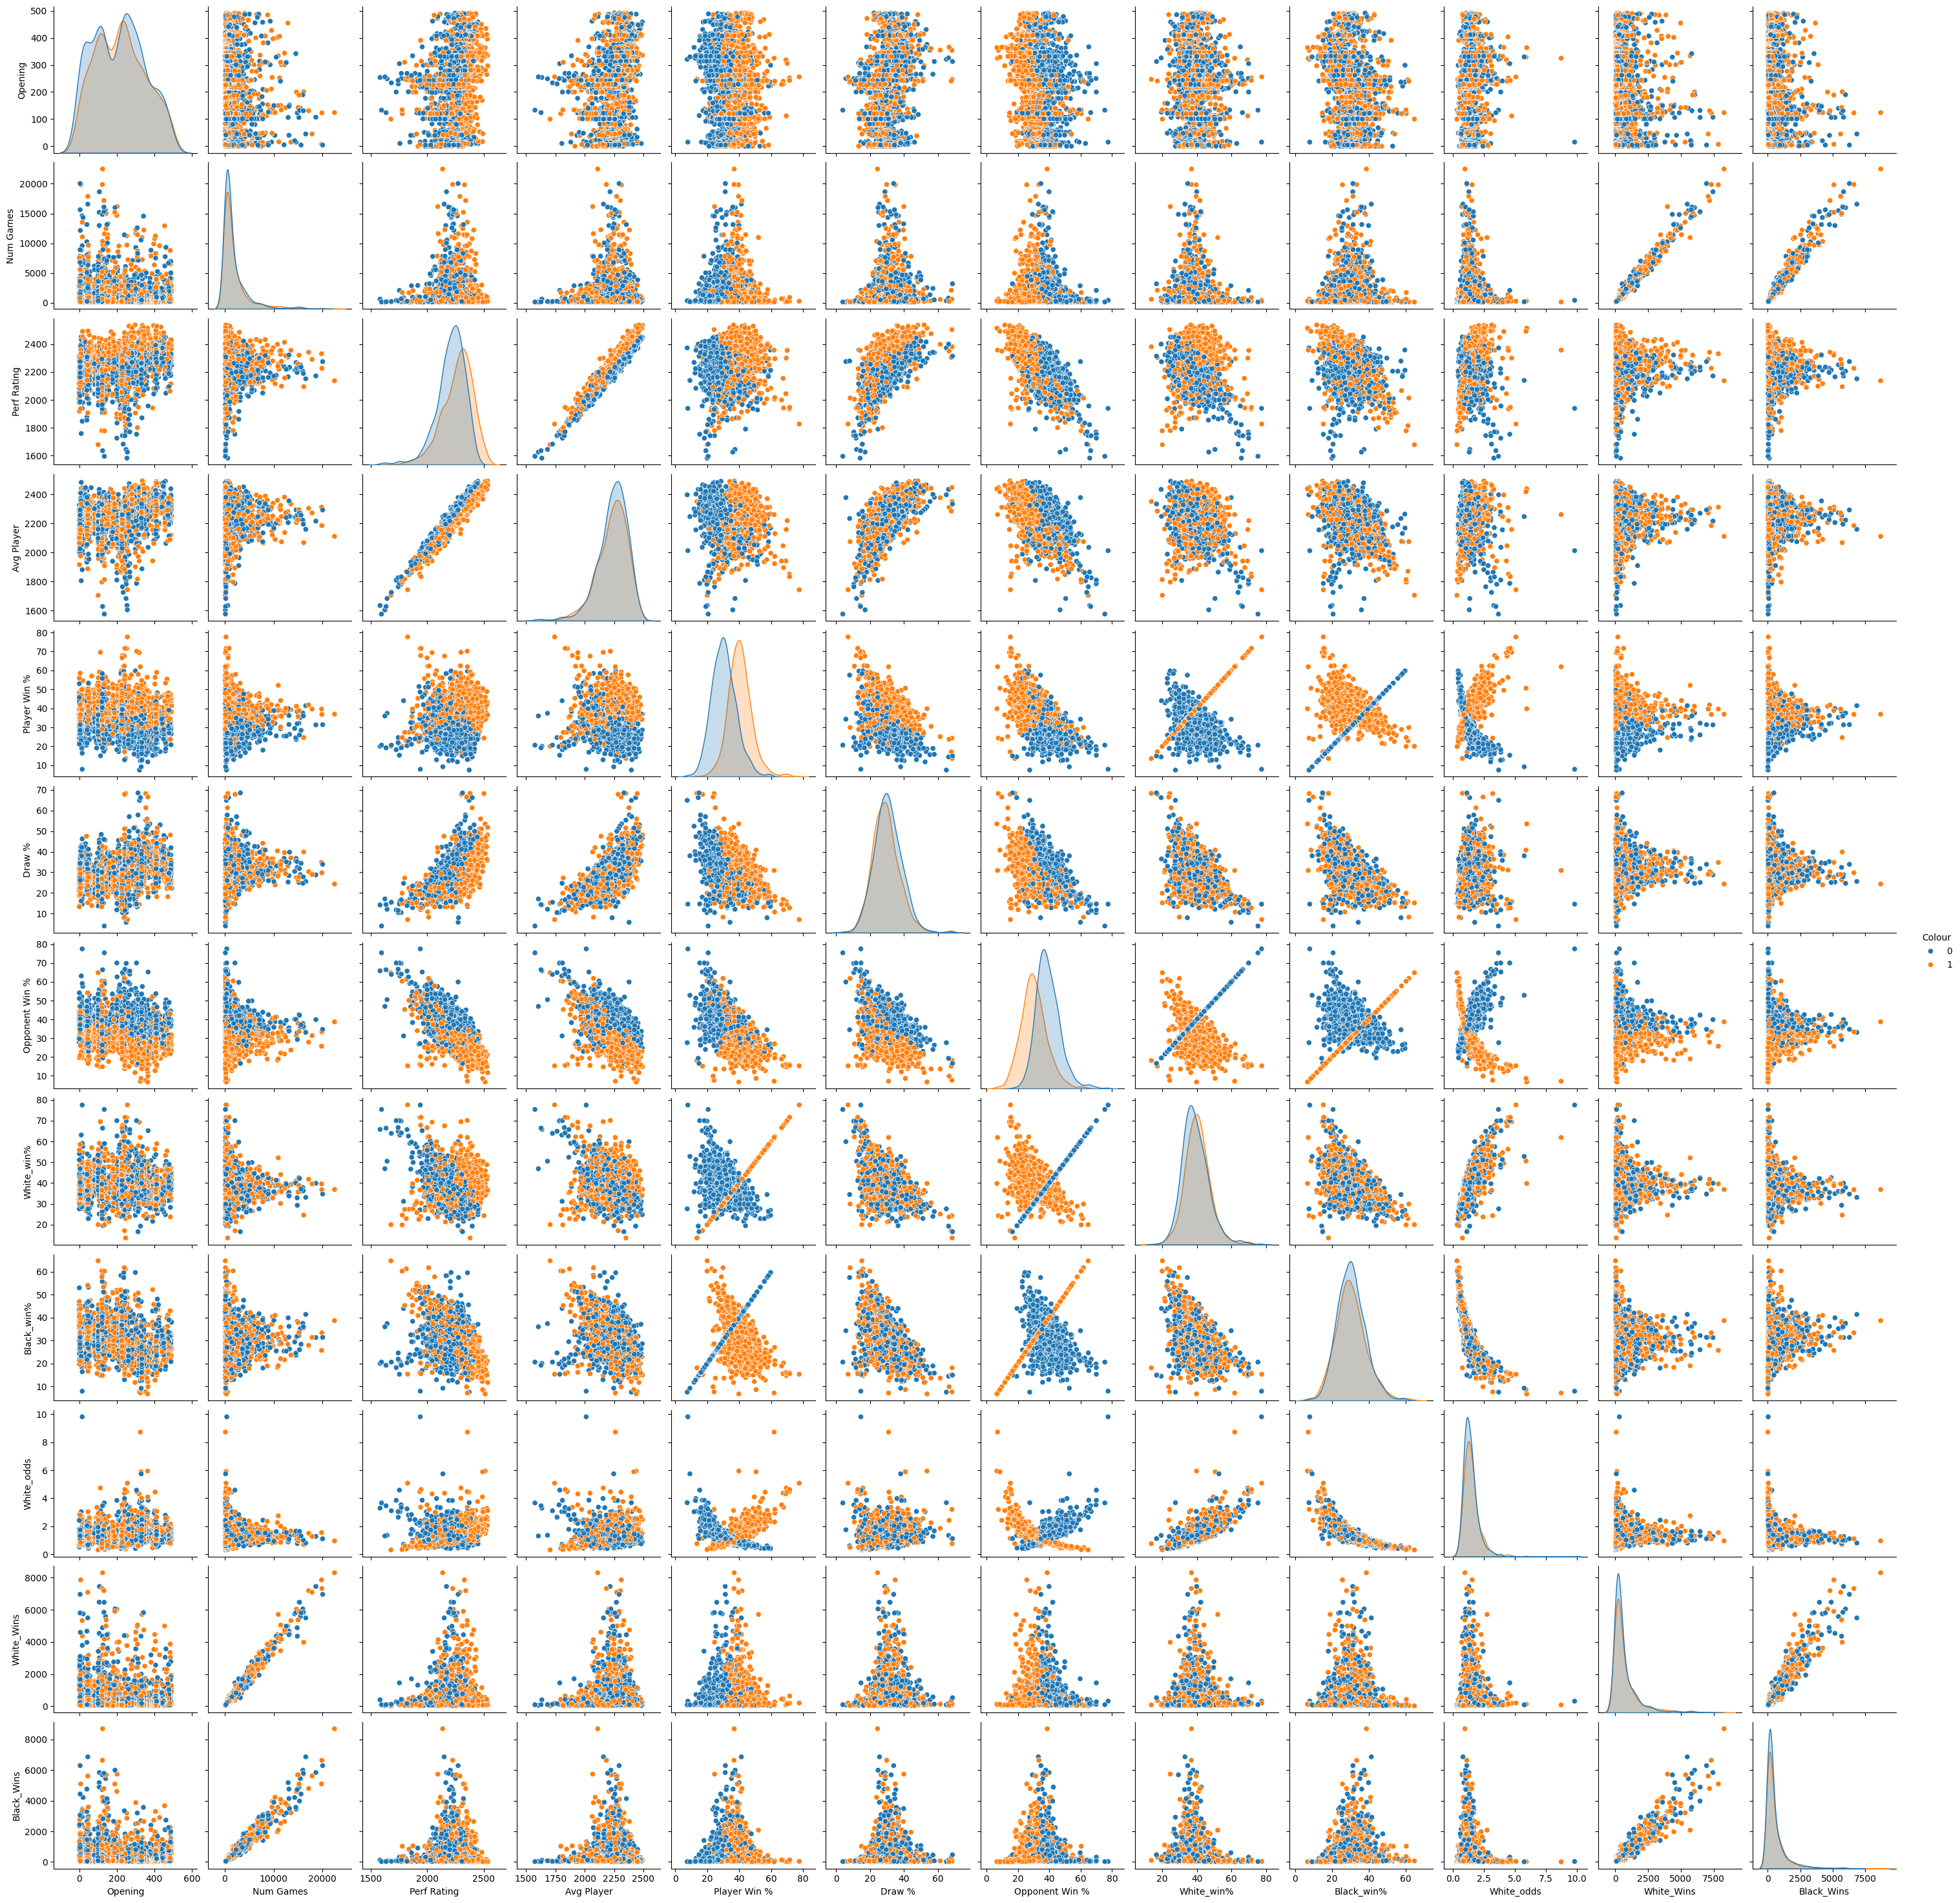

In [35]:
#look at column perf rating

sns.pairplot(data, hue='Colour')

In [42]:
#find the correlation between the columns
data.corr()


Opening    Colour  Num Games  Perf Rating  Avg Player  \
Opening         1.000000  0.036155  -0.103983     0.234996    0.237043   
Colour          0.036155  1.000000   0.013621     0.219056   -0.011126   
Num Games      -0.103983  0.013621   1.000000     0.051798    0.054033   
Perf Rating     0.234996  0.219056   0.051798     1.000000    0.954294   
Avg Player      0.237043 -0.011126   0.054033     0.954294    1.000000   
Player Win %   -0.075415  0.547895  -0.050853     0.115821   -0.106988   
Draw %          0.259186 -0.064061   0.127185     0.630493    0.678930   
Opponent Win % -0.152519 -0.485598  -0.060936    -0.666871   -0.488975   
White_win%     -0.020553  0.081235  -0.118459    -0.258968   -0.301482   
Black_win%     -0.241601 -0.013522  -0.014081    -0.386681   -0.394600   
White_odds      0.141096  0.059835  -0.097293     0.044183    0.014757   
White_Wins     -0.097786  0.024525   0.989485     0.041896    0.040907   
Black_Wins     -0.140836  0.012015   0.977510     0.005909    0.005906   

                Player Win %    Draw %  Opponent Win %  White_win%  \
Opening            -0.075415  0.259186       -0.152519   -0.020553   
Colour              0.547895 -0.064061       -0.485598    0.081235   
Num Games          -0.050853  0.127185       -0.060936   -0.118459   
Perf Rating         0.115821  0.630493       -0.666871   -0.258968   
Avg Player         -0.106988  0.678930       -0.488975   -0.301482   
Player Win %        1.000000 -0.430260       -0.611919    0.226732   
Draw %             -0.430260  1.000000       -0.450666   -0.485369   
Opponent Win %     -0.611919 -0.450666        1.000000    0.201202   
White_win%          0.226732 -0.485369        0.201202    1.000000   
Black_win%          0.215659 -0.541545        0.261090   -0.472137   
White_odds          0.005215  0.073293       -0.069329    0.738311   
White_Wins         -0.027577  0.091436       -0.052608   -0.044081   
Black_Wins         -0.023216  0.058806       -0.028330   -0.156820   

                Black_win%  White_odds  White_Wins  Black_Wins  
Opening          -0.241601    0.141096   -0.097786   -0.140836  
Colour           -0.013522    0.059835    0.024525    0.012015  
Num Games        -0.014081   -0.097293    0.989485    0.977510  
Perf Rating      -0.386681    0.044183    0.041896    0.005909  
Avg Player       -0.394600    0.014757    0.040907    0.005906  
Player Win %      0.215659    0.005215   -0.027577   -0.023216  
Draw %           -0.541545    0.073293    0.091436    0.058806  
Opponent Win %    0.261090   -0.069329   -0.052608   -0.028330  
White_win%       -0.472137    0.738311   -0.044081   -0.156820  
Black_win%        1.000000   -0.783921   -0.049539    0.091793  
White_odds       -0.783921    1.000000   -0.046262   -0.168144  
White_Wins       -0.049539   -0.046262    1.000000    0.952201  
Black_Wins        0.091793   -0.168144    0.952201    1.000000

In [49]:

from scipy import stats
import numpy as np
import math

def z_test(data, column1, column2):
    corr = data[column1].corr(data[column2])
    n = len(data)
    z = 0.5 * math.log((1 + corr) / (1 - corr))
    se = 1 / math.sqrt(n - 3)
    z = z / se
    p = stats.norm.sf(abs(z)) * 2
    return p

print(z_test(data, 'Colour', 'Player Win %'))
print(z_test(data, 'Opening', 'Player Win %'))
print(z_test(data, 'Perf Rating', 'Player Win %'))


6.345563223486472e-157
0.0010491874956717229
4.5150715473826306e-07
